<a href="https://colab.research.google.com/github/AftabUdaipurwala/ImageClassification/blob/main/Celebrity_Face_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Image Processing Algorithm using Support Vector machine***

***Loading Data in Dataset***

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
!ls '/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/images_dataset/virat_kohli'

02fa06cf94.jpg	3f5fd4fead.jpg	76a06a6ec1.jpg	9e308996ca.jpg	d0dbbb10a1.jpg
05b9bac90a.jpg	41de91b30f.jpg	7953108375.jpg	9e30af3e8d.jpg	d3b3c15c31.jpg
088db66e0b.jpg	47f53ee402.jpg	7e224dbc5c.jpg	a18f264208.jpg	d926a8b18d.jpg
0b43460429.jpg	49f7355f97.jpg	7fde5779f6.jpg	a410364f02.jpg	da99f49cfd.jpg
0b53cce8c6.jpg	4cbef36ff6.jpg	80b6d56dca.jpg	a45a1e7929.jpg	db14c38dcd.jpg
0eb2230fbf.jpg	5181ba2b71.jpg	83cf04fd82.jpg	a76fdd6705.jpg	dec07e4775.jpg
1146943f73.jpg	52345a338c.jpg	83f9de72c1.jpg	aa9aff20c8.jpg	e158b6a853.jpg
132a62a742.jpg	549e5c755e.jpg	84b8ff940f.jpg	aacdbc91c5.jpg	e309859808.jpg
150fc612d2.jpg	55620911db.jpg	84d7142d38.jpg	b1b30289cc.jpg	e5de3a7e94.jpg
1fee075645.jpg	59a89ee258.jpg	85420dacb0.jpg	b24633ff69.jpg	ea43ba6899.jpg
2018439965.jpg	5a3384f779.jpg	877f7e3ca1.jpg	b2f20fd674.jpg	ee9b8b6b6b.jpg
266f9eacf3.jpg	5e51e39db9.jpg	8816565b00.jpg	b66da3c9c7.jpg	eede89a24b.jpg
27ad99a806.jpg	631e46db26.jpg	90217af76e.jpg	b79492fc98.jpg	f4f9df9fcc.jpg
28e155755b.jpg	632b7bb5ea

In [154]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns
import cv2
import pywt

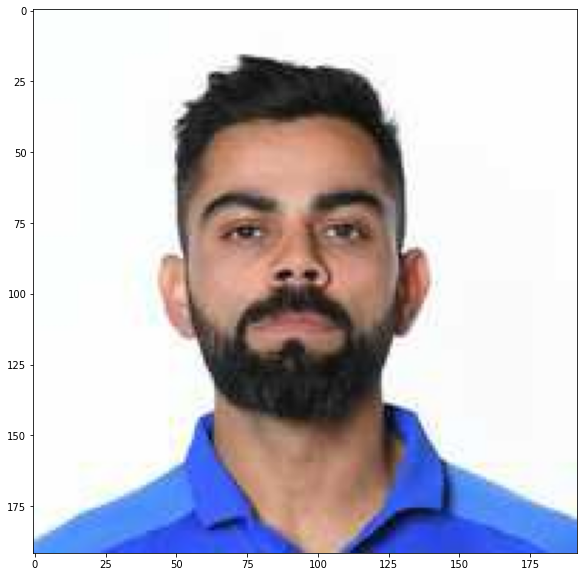

In [155]:
# Check couple of images
img =cv2.imread('/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/images_dataset/virat_kohli/fc75b07003.jpg')
img.shape
# Check Sharapova , using this cv2.COLOR_BGR2RGB to correct the colours in the image to see it in actual colors else it will show in negative images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [156]:
# Converting images to gray scale so that you can remove the RGB channels 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape 

(192, 192)

In [157]:
gray

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [158, 150, 142, ..., 124, 124, 124],
       [155, 150, 142, ..., 123, 123, 122],
       [143, 143, 143, ..., 123, 122, 122]], dtype=uint8)

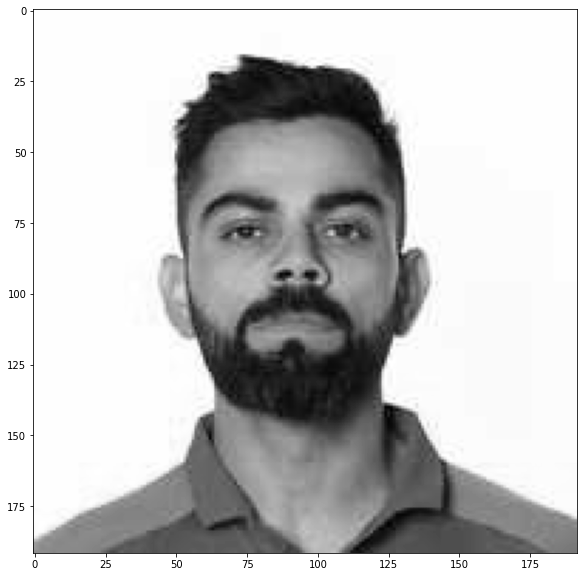

In [158]:
plt.imshow(gray, cmap='gray')

In [159]:
# Loading Haar cascade for checking the 2 eyes and face of each images
face_cascades = cv2.CascadeClassifier('/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascades = cv2.CascadeClassifier('/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascades.detectMultiScale(gray, 1.3,5)
faces


array([[44, 36, 98, 98]], dtype=int32)

In [160]:
(x,y,w,h)= faces[0]
x,y,w,h

(44, 36, 98, 98)

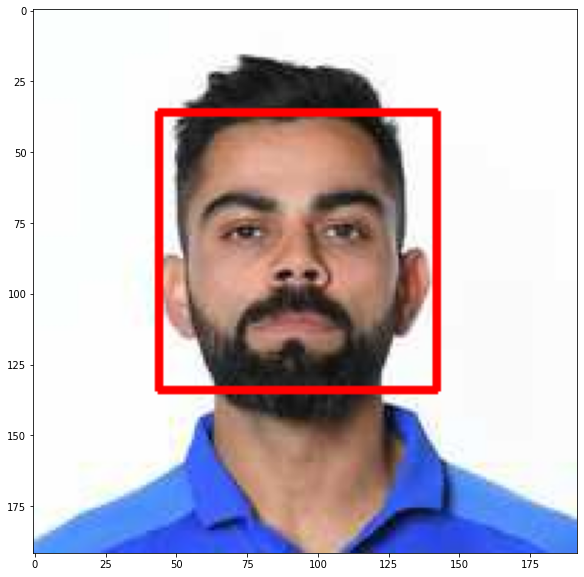

In [161]:
# Detecting Face using Face cascades
face_img= cv2.rectangle(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(x,y), (x+w,y+h),(255,0,0),2 )
plt.imshow(face_img)

<function matplotlib.pyplot.show>

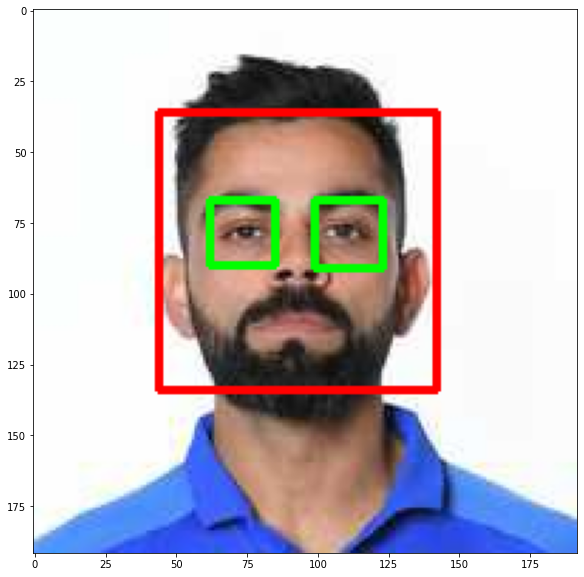

In [162]:
# Detecting Eyes in the face using eye_cascades program of Open CV

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img=cv2.rectangle(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(x,y), (x+w,y+h),(255,0,0),2 )
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eyes= eye_cascades.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey), (ex+ew,ey+eh),(0,255,0),2 )

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show

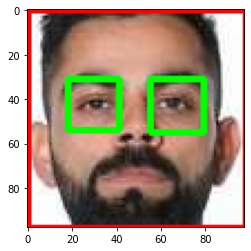

In [163]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [164]:
# Create a function that can extract region of interest (cropped area) from the images which has 2 eyes present in it

def get_cropped_image_if_2_eyes(imagepath):
  img = cv2.imread(imagepath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascades.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes= eye_cascades.detectMultiScale(roi_gray)
    if len(eyes)>=2:
      return roi_color
  


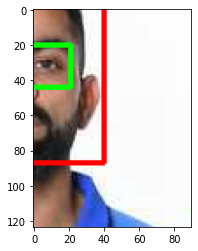

In [165]:
# Checking if that function works
cropped_image= get_cropped_image_if_2_eyes('/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/images_dataset/virat_kohli/kohli1.jpg')
plt.imshow(cropped_image)